In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [66]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
df = pd.read_csv('/home/ujjawal/Downloads/creditcardfraud/creditcard.csv')

In [68]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
df.shape

(284807, 31)

In [71]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [72]:
df['Class'].unique()

array([0, 1])

In [73]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [74]:
not_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [75]:
not_fraud.shape

(284315, 31)

In [76]:
fraud.shape

(492, 31)

In [77]:
not_fraud = not_fraud.sample(fraud.shape[0])

In [78]:
not_fraud.shape

(492, 31)

In [79]:
dataset = pd.concat([fraud,not_fraud])

In [80]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [81]:
dataset.shape

(984, 31)

In [82]:
dataset = dataset.reset_index()

In [83]:
dataset.drop('index' , axis=1, inplace=True)

In [84]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [85]:
dataset.shape

(984, 31)

In [86]:
dataset.loc[5]

Time      7526.000000
V1           0.008430
V2           4.137837
V3          -6.240697
V4           6.675732
V5           0.768307
V6          -3.353060
V7          -1.631735
V8           0.154612
V9          -2.795892
V10         -6.187891
V11          5.664395
V12         -9.854485
V13         -0.306167
V14        -10.691196
V15         -0.638498
V16         -2.041974
V17         -1.129056
V18          0.116453
V19         -1.934666
V20          0.488378
V21          0.364514
V22         -0.608057
V23         -0.539528
V24          0.128940
V25          1.488481
V26          0.507963
V27          0.735822
V28          0.513574
Amount       1.000000
Class        1.000000
Name: 5, dtype: float64

In [87]:
X = dataset.iloc[: , : -1]

In [88]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [89]:
y = dataset['Class']

In [90]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [92]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [94]:
X_train.shape

(787, 30, 1)

In [95]:
X_train[0].shape

(30, 1)

In [96]:
#CNN

In [97]:
model = Sequential([
    Conv1D(32, 2, activation='relu', input_shape= X_train[0].shape),
    BatchNormalization(),
    MaxPool1D(2),
    Dropout(0.2),
    
    Conv1D(64, 2, activation='relu'),
    BatchNormalization(),
    MaxPool1D(2),
    Dropout(0.5),
    
    Flatten(),
    Dense(64, activation= 'relu'),
    Dropout(0.5),
    
    Dense(1, activation= 'sigmoid')
])

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 64)            

In [99]:
model.compile(optimizer=Adam(lr=0.001), loss = 'binary_crossentropy', metrics= ['accuracy'])

In [100]:
result = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_test, y_test))

Train on 787 samples, validate on 197 samples
Epoch 1/500
787/787 [==============================] - 0s 624us/sample - loss: 0.6582 - acc: 0.7548 - val_loss: 0.5298 - val_acc: 0.8883
Epoch 2/500
787/787 [==============================] - 0s 129us/sample - loss: 0.3896 - acc: 0.8640 - val_loss: 0.4797 - val_acc: 0.9391
Epoch 3/500
787/787 [==============================] - 0s 123us/sample - loss: 0.4006 - acc: 0.8806 - val_loss: 0.4162 - val_acc: 0.9391
Epoch 4/500
787/787 [==============================] - 0s 126us/sample - loss: 0.3158 - acc: 0.8996 - val_loss: 0.3551 - val_acc: 0.9492
Epoch 5/500
787/787 [==============================] - 0s 123us/sample - loss: 0.3025 - acc: 0.8971 - val_loss: 0.2977 - val_acc: 0.9594
Epoch 6/500
787/787 [==============================] - 0s 131us/sample - loss: 0.2354 - acc: 0.9212 - val_loss: 0.2520 - val_acc: 0.9594
Epoch 7/500
787/787 [==============================] - 0s 131us/sample - loss: 0.2609 - acc: 0.9174 - val_loss: 0.2176 - val_acc: 0.

787/787 [==============================] - 0s 120us/sample - loss: 0.1422 - acc: 0.9454 - val_loss: 0.1398 - val_acc: 0.9594
Epoch 61/500
787/787 [==============================] - 0s 118us/sample - loss: 0.1499 - acc: 0.9530 - val_loss: 0.1402 - val_acc: 0.9645
Epoch 62/500
787/787 [==============================] - 0s 117us/sample - loss: 0.1290 - acc: 0.9517 - val_loss: 0.1388 - val_acc: 0.9594
Epoch 63/500
787/787 [==============================] - 0s 125us/sample - loss: 0.1328 - acc: 0.9466 - val_loss: 0.1440 - val_acc: 0.9594
Epoch 64/500
787/787 [==============================] - 0s 125us/sample - loss: 0.1341 - acc: 0.9479 - val_loss: 0.1461 - val_acc: 0.9645
Epoch 65/500
787/787 [==============================] - 0s 125us/sample - loss: 0.1369 - acc: 0.9479 - val_loss: 0.1475 - val_acc: 0.9594
Epoch 66/500
787/787 [==============================] - 0s 120us/sample - loss: 0.1275 - acc: 0.9543 - val_loss: 0.1450 - val_acc: 0.9594
Epoch 67/500
787/787 [=========================

787/787 [==============================] - 0s 128us/sample - loss: 0.0981 - acc: 0.9593 - val_loss: 0.1557 - val_acc: 0.9594
Epoch 120/500
787/787 [==============================] - 0s 126us/sample - loss: 0.0945 - acc: 0.9708 - val_loss: 0.1561 - val_acc: 0.9695
Epoch 121/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0832 - acc: 0.9682 - val_loss: 0.1598 - val_acc: 0.9645
Epoch 122/500
787/787 [==============================] - 0s 127us/sample - loss: 0.0957 - acc: 0.9632 - val_loss: 0.1645 - val_acc: 0.9645
Epoch 123/500
787/787 [==============================] - 0s 129us/sample - loss: 0.0900 - acc: 0.9657 - val_loss: 0.1701 - val_acc: 0.9645
Epoch 124/500
787/787 [==============================] - 0s 129us/sample - loss: 0.0987 - acc: 0.9619 - val_loss: 0.1752 - val_acc: 0.9645
Epoch 125/500
787/787 [==============================] - 0s 131us/sample - loss: 0.0922 - acc: 0.9670 - val_loss: 0.1728 - val_acc: 0.9645
Epoch 126/500
787/787 [==================

787/787 [==============================] - 0s 126us/sample - loss: 0.0817 - acc: 0.9682 - val_loss: 0.1769 - val_acc: 0.9645
Epoch 179/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0906 - acc: 0.9632 - val_loss: 0.1746 - val_acc: 0.9594
Epoch 180/500
787/787 [==============================] - 0s 127us/sample - loss: 0.0722 - acc: 0.9695 - val_loss: 0.1730 - val_acc: 0.9594
Epoch 181/500
787/787 [==============================] - 0s 123us/sample - loss: 0.0928 - acc: 0.9670 - val_loss: 0.1700 - val_acc: 0.9594
Epoch 182/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0826 - acc: 0.9695 - val_loss: 0.1739 - val_acc: 0.9594
Epoch 183/500
787/787 [==============================] - 0s 126us/sample - loss: 0.0701 - acc: 0.9708 - val_loss: 0.1750 - val_acc: 0.9594
Epoch 184/500
787/787 [==============================] - 0s 122us/sample - loss: 0.0676 - acc: 0.9759 - val_loss: 0.1747 - val_acc: 0.9594
Epoch 185/500
787/787 [==================

787/787 [==============================] - 0s 126us/sample - loss: 0.0675 - acc: 0.9733 - val_loss: 0.2192 - val_acc: 0.9594
Epoch 238/500
787/787 [==============================] - 0s 122us/sample - loss: 0.0787 - acc: 0.9695 - val_loss: 0.2139 - val_acc: 0.9594
Epoch 239/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0630 - acc: 0.9720 - val_loss: 0.2050 - val_acc: 0.9594
Epoch 240/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0500 - acc: 0.9822 - val_loss: 0.1971 - val_acc: 0.9594
Epoch 241/500
787/787 [==============================] - 0s 126us/sample - loss: 0.0696 - acc: 0.9733 - val_loss: 0.1947 - val_acc: 0.9594
Epoch 242/500
787/787 [==============================] - 0s 125us/sample - loss: 0.0609 - acc: 0.9784 - val_loss: 0.2010 - val_acc: 0.9594
Epoch 243/500
787/787 [==============================] - 0s 128us/sample - loss: 0.0737 - acc: 0.9695 - val_loss: 0.2071 - val_acc: 0.9594
Epoch 244/500
787/787 [==================

787/787 [==============================] - 0s 129us/sample - loss: 0.0638 - acc: 0.9797 - val_loss: 0.2067 - val_acc: 0.9645
Epoch 297/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0594 - acc: 0.9809 - val_loss: 0.2046 - val_acc: 0.9594
Epoch 298/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0575 - acc: 0.9797 - val_loss: 0.2070 - val_acc: 0.9594
Epoch 299/500
787/787 [==============================] - 0s 121us/sample - loss: 0.0450 - acc: 0.9860 - val_loss: 0.2117 - val_acc: 0.9645
Epoch 300/500
787/787 [==============================] - 0s 122us/sample - loss: 0.0468 - acc: 0.9835 - val_loss: 0.2112 - val_acc: 0.9594
Epoch 301/500
787/787 [==============================] - 0s 121us/sample - loss: 0.0563 - acc: 0.9848 - val_loss: 0.2076 - val_acc: 0.9594
Epoch 302/500
787/787 [==============================] - 0s 122us/sample - loss: 0.0559 - acc: 0.9848 - val_loss: 0.2068 - val_acc: 0.9594
Epoch 303/500
787/787 [==================

787/787 [==============================] - 0s 125us/sample - loss: 0.0589 - acc: 0.9797 - val_loss: 0.2206 - val_acc: 0.9594
Epoch 356/500
787/787 [==============================] - 0s 125us/sample - loss: 0.0427 - acc: 0.9835 - val_loss: 0.2164 - val_acc: 0.9543
Epoch 357/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0468 - acc: 0.9835 - val_loss: 0.2256 - val_acc: 0.9543
Epoch 358/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0595 - acc: 0.9746 - val_loss: 0.2334 - val_acc: 0.9645
Epoch 359/500
787/787 [==============================] - 0s 123us/sample - loss: 0.0363 - acc: 0.9898 - val_loss: 0.2281 - val_acc: 0.9594
Epoch 360/500
787/787 [==============================] - 0s 121us/sample - loss: 0.0533 - acc: 0.9797 - val_loss: 0.2358 - val_acc: 0.9645
Epoch 361/500
787/787 [==============================] - 0s 121us/sample - loss: 0.0532 - acc: 0.9771 - val_loss: 0.2341 - val_acc: 0.9645
Epoch 362/500
787/787 [==================

787/787 [==============================] - 0s 124us/sample - loss: 0.0450 - acc: 0.9797 - val_loss: 0.2124 - val_acc: 0.9594
Epoch 415/500
787/787 [==============================] - 0s 127us/sample - loss: 0.0359 - acc: 0.9809 - val_loss: 0.2178 - val_acc: 0.9594
Epoch 416/500
787/787 [==============================] - 0s 124us/sample - loss: 0.0600 - acc: 0.9784 - val_loss: 0.2193 - val_acc: 0.9645
Epoch 417/500
787/787 [==============================] - 0s 117us/sample - loss: 0.0346 - acc: 0.9848 - val_loss: 0.2223 - val_acc: 0.9645
Epoch 418/500
787/787 [==============================] - 0s 122us/sample - loss: 0.0457 - acc: 0.9835 - val_loss: 0.2190 - val_acc: 0.9543
Epoch 419/500
787/787 [==============================] - 0s 130us/sample - loss: 0.0677 - acc: 0.9784 - val_loss: 0.2303 - val_acc: 0.9594
Epoch 420/500
787/787 [==============================] - 0s 136us/sample - loss: 0.0467 - acc: 0.9822 - val_loss: 0.2155 - val_acc: 0.9594
Epoch 421/500
787/787 [==================

787/787 [==============================] - 0s 126us/sample - loss: 0.0384 - acc: 0.9822 - val_loss: 0.2308 - val_acc: 0.9594
Epoch 474/500
787/787 [==============================] - 0s 128us/sample - loss: 0.0364 - acc: 0.9886 - val_loss: 0.2219 - val_acc: 0.9594
Epoch 475/500
787/787 [==============================] - 0s 125us/sample - loss: 0.0524 - acc: 0.9771 - val_loss: 0.2328 - val_acc: 0.9594
Epoch 476/500
787/787 [==============================] - 0s 134us/sample - loss: 0.0501 - acc: 0.9835 - val_loss: 0.2339 - val_acc: 0.9594
Epoch 477/500
787/787 [==============================] - 0s 139us/sample - loss: 0.0337 - acc: 0.9886 - val_loss: 0.2349 - val_acc: 0.9594
Epoch 478/500
787/787 [==============================] - 0s 135us/sample - loss: 0.0368 - acc: 0.9771 - val_loss: 0.2359 - val_acc: 0.9645
Epoch 479/500
787/787 [==============================] - 0s 128us/sample - loss: 0.0289 - acc: 0.9873 - val_loss: 0.2378 - val_acc: 0.9543
Epoch 480/500
787/787 [==================

In [101]:
epochs = 500

In [102]:
epoch_range = range(1,epochs+1)

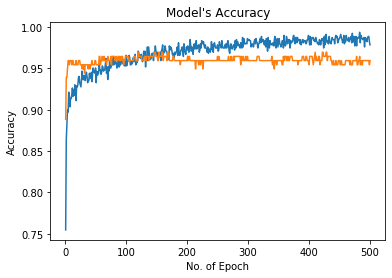

In [103]:
plt.plot(epoch_range, result.history['acc'])
plt.plot(epoch_range, result.history['val_acc'])
plt.title('Model\'s Accuracy')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()